# demo02_car.ipynb   小汽车分类

In [2]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('car.txt', header=None)
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
data[6].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: 6, dtype: int64

## 确定：是分类问题，还是回归问题？
答：分类

## 选哪一个分类模型：逻辑回归、决策树、RF、GBDT、AdaBoost？
答：RF（当然也可以尝试其他模型）

## 针对当前这组数据完成标签编码预处理

In [6]:
import sklearn.preprocessing as sp
import sklearn.ensemble as se
import sklearn.model_selection as ms
import sklearn.metrics as sm

# 遍历每一列数据
train_data = pd.DataFrame([])
encoders = {}
for col_ind, col_val in data.items():
    encoder = sp.LabelEncoder()
    train_data[col_ind] = encoder.fit_transform(col_val)
    encoders[col_ind] = encoder
    
# 整理输入集与输出集
x, y = train_data.iloc[:, :-1], train_data[6]
# 创建分类模型
model = se.RandomForestClassifier(max_depth=9, n_estimators=140, random_state=7)

# 验证曲线，选取最优超参数

In [8]:
import matplotlib.pyplot as plt

params = np.arange(100, 200, 10)
train_scores, test_scores = \
    ms.validation_curve(model, x, y, 'n_estimators', params, cv=5)
scores = test_scores.mean(axis=1)
scores

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_estimators, param_range=[100 110 120 130 140 150 160 170 180 190] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([0.80273771, 0.80735863, 0.80678227, 0.80736031, 0.80967077,
       0.80562453, 0.80215465, 0.79984251, 0.79579626, 0.79579794])

C:\Users\loklio\AppData\Local\Temp\ipykernel_8348\2997991440.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(params, scores, 'o-', color='dodgerblue', label='n_estimators VC',


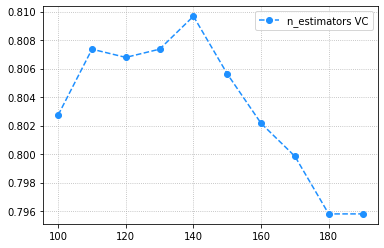

In [9]:
# 验证曲线可视化
plt.grid(linestyle=':')
plt.plot(params, scores, 'o-', color='dodgerblue', label='n_estimators VC',
            linestyle='--')
plt.legend()

In [10]:
# 调整max_depth
params = np.arange(1, 12)
train_scores, test_scores = \
    ms.validation_curve(model, x, y, 'max_depth', params, cv=5)
scores = test_scores.mean(axis=1)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=max_depth, param_range=[ 1  2  3  4  5  6  7  8  9 10 11] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


C:\Users\loklio\AppData\Local\Temp\ipykernel_8348\1272668999.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(params, scores, 'o-', color='orangered', label='max_depth VC',


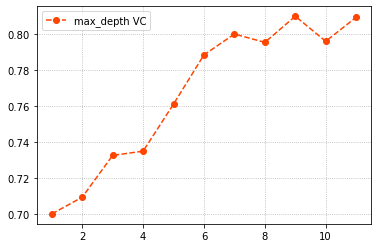

In [11]:
# 验证曲线可视化
plt.grid(linestyle=':')
plt.plot(params, scores, 'o-', color='orangered', label='max_depth VC',
            linestyle='--')
plt.legend()

## 学习曲线，选取最优训练集大小

In [12]:
params = np.arange(0.1, 1.1, 0.1)
_, train_scores, test_scores = \
    ms.learning_curve(model, x, y, train_sizes=params, cv=5)
scores = test_scores.mean(axis=1)

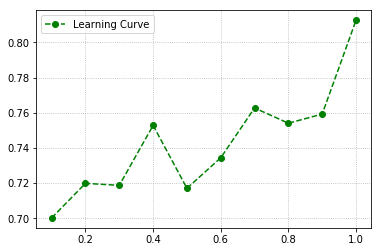

In [90]:
# 学习曲线可视化
plt.grid(linestyle=':')
plt.plot(params, scores, 'o-', color='green', label='Learning Curve',
            linestyle='--')
plt.legend()

In [86]:
# 做5次交叉验证，验证一下这个模型是否可用
scores = ms.cross_val_score(model, x, y, cv=5, scoring='f1_weighted')
# 如果分数还可以，再正儿八经的训练模型
print(scores.mean())

C:\Users\xuming\AppData\Local\Continuum\anaconda3\envs\aid\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\xuming\AppData\Local\Continuum\anaconda3\envs\aid\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.793472120346457


## 模型评估（先用训练样本进行模型评估）

In [87]:
model.fit(x, y)
pred_y = model.predict(x)
print(sm.classification_report(y, pred_y))
print(sm.confusion_matrix(y, pred_y))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98       384
          1       1.00      0.75      0.86        69
          2       1.00      1.00      1.00      1210
          3       0.94      1.00      0.97        65

avg / total       0.99      0.99      0.99      1728

[[ 383    0    0    1]
 [  14   52    0    3]
 [   3    0 1207    0]
 [   0    0    0   65]]


In [88]:
data = [['high', 'med', '5more', '4', 'big', 'low', 'unacc'],
        ['high', 'high', '4', '4', 'med', 'med', 'acc'],
        ['low', 'low', '2', '4', 'small', 'high', 'good'],
        ['low', 'med', '3', '4', 'med', 'high', 'vgood']]

test_data = pd.DataFrame(data)
for col_ind, col_val in test_data.items():
    encoder = encoders[col_ind]
    encoded_col = encoder.transform(col_val)
    test_data[col_ind] = encoded_col
# 整理输入集与输出集
test_x, test_y = test_data.iloc[:, :-1], test_data[6]
pred_test_y = model.predict(test_x)
encoders[6].inverse_transform(pred_test_y) 

C:\Users\xuming\AppData\Local\Continuum\anaconda3\envs\aid\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['unacc', 'acc', 'good', 'vgood'], dtype=object)